In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Question 1

Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume that all inputs are strings.

In [2]:
def reverse(text):
    return text[::-1]


print(reverse("forward"))

drawrof


<IPython.core.display.Javascript object>

# Question 2

Complete the function below, which uses Bayes's theorem to calculate and return the posterior probability of an event A, given the known outcome of event B.

In [3]:
def bayes(a, b_given_a, b_given_not_a):
    """Calculates P(A | B) using Bayes's theorem.
    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)"""

    pab = (a * b_given_a) / ((a * b_given_a) + ((1 - a) * b_given_not_a))
    return pab


bayes(0.01, 0.9, 0.9)

0.01

<IPython.core.display.Javascript object>

# Question 3

In this challenge, you'll be using the Lahman Baseball Dataset. In particular, you'll be focusing on the pitching table. We'll get you started, and you just need to add code to view histograms of the features to answer the following questions.
To start, create a histogram of the features in the pitching table.
HINT: Your histograms will be eaiser to visualize if you use the following parameters within hist:
bins=100,figsize=(16,16))

Here is your starter code:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/lahman_pitching.csv')

""" let's filter it """

df = df[df['yearID'] >= 1950]

""" Add your code after this in your own Colab Notebook"""

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

<IPython.core.display.Javascript object>

In [5]:
# read the csv file
df = pd.read_csv(
    "https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/lahman_pitching.csv"
)
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2004,1,SFN,NL,1,0,11,0,0,...,0.0,0.0,2.0,0.0,61.0,5.0,8,NaN,NaN,NaN
1,aardsda01,2006,1,CHN,NL,3,0,45,0,0,...,0.0,1.0,1.0,0.0,225.0,9.0,25,NaN,NaN,NaN
2,aardsda01,2007,1,CHA,AL,2,1,25,0,0,...,3.0,2.0,1.0,0.0,151.0,7.0,24,NaN,NaN,NaN
3,aardsda01,2008,1,BOS,AL,4,2,47,0,0,...,2.0,3.0,5.0,0.0,228.0,7.0,32,NaN,NaN,NaN
4,aardsda01,2009,1,SEA,AL,3,6,73,0,0,...,3.0,2.0,0.0,0.0,296.0,53.0,23,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41857 entries, 0 to 41856
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  41857 non-null  object 
 1   yearID    41857 non-null  int64  
 2   stint     41857 non-null  int64  
 3   teamID    41857 non-null  object 
 4   lgID      41726 non-null  object 
 5   W         41857 non-null  int64  
 6   L         41857 non-null  int64  
 7   G         41857 non-null  int64  
 8   GS        41857 non-null  int64  
 9   CG        41857 non-null  int64  
 10  SHO       41857 non-null  int64  
 11  SV        41857 non-null  int64  
 12  IPouts    41857 non-null  int64  
 13  H         41857 non-null  int64  
 14  ER        41857 non-null  int64  
 15  HR        41857 non-null  int64  
 16  BB        41857 non-null  int64  
 17  SO        41857 non-null  int64  
 18  BAOpp     33416 non-null  float64
 19  ERA       41773 non-null  float64
 20  IBB       27278 non-null  fl

<IPython.core.display.Javascript object>

   3a. For all records since 1995, plot histograms for the following three variables: stolen bases per game, wins, and earned run average. Which distribution do they appear to follow? Consider what each variable is measuring, as well as the histogram's shape.

In [7]:
# select record since 1995
df_after1950 = df[(df["yearID"] >= 1950)]
df_after1950.head()
df_after1950[["GS", "BAOpp", "W", "L"]].head(10)

,GS,BAOpp,W,L
0,0,0.41,1,0
1,0,NaN,3,0
2,0,NaN,2,1
3,0,NaN,4,2
4,0,NaN,3,6
5,0,NaN,0,6
6,0,NaN,0,0
7,13,0.24,6,2
8,29,0.27,11,8
9,28,0.27,9,10


<IPython.core.display.Javascript object>

In [8]:
df_after1950.shape

(28520, 30)

<IPython.core.display.Javascript object>

In [9]:
df_after1950[["GS", "BAOpp", "W", "L"]].describe()

,GS,BAOpp,W,L
count,28520.000000,20964.000000,28520.000000,28520.000000
mean,8.530715,0.249426,4.260273,4.260309
std,11.735459,0.094291,4.938938,4.289554
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.230000,0.000000,1.000000
50%,1.000000,0.250000,2.000000,3.000000
75%,15.000000,0.280000,7.000000,7.000000
max,49.000000,1.000000,31.000000,24.000000


<IPython.core.display.Javascript object>

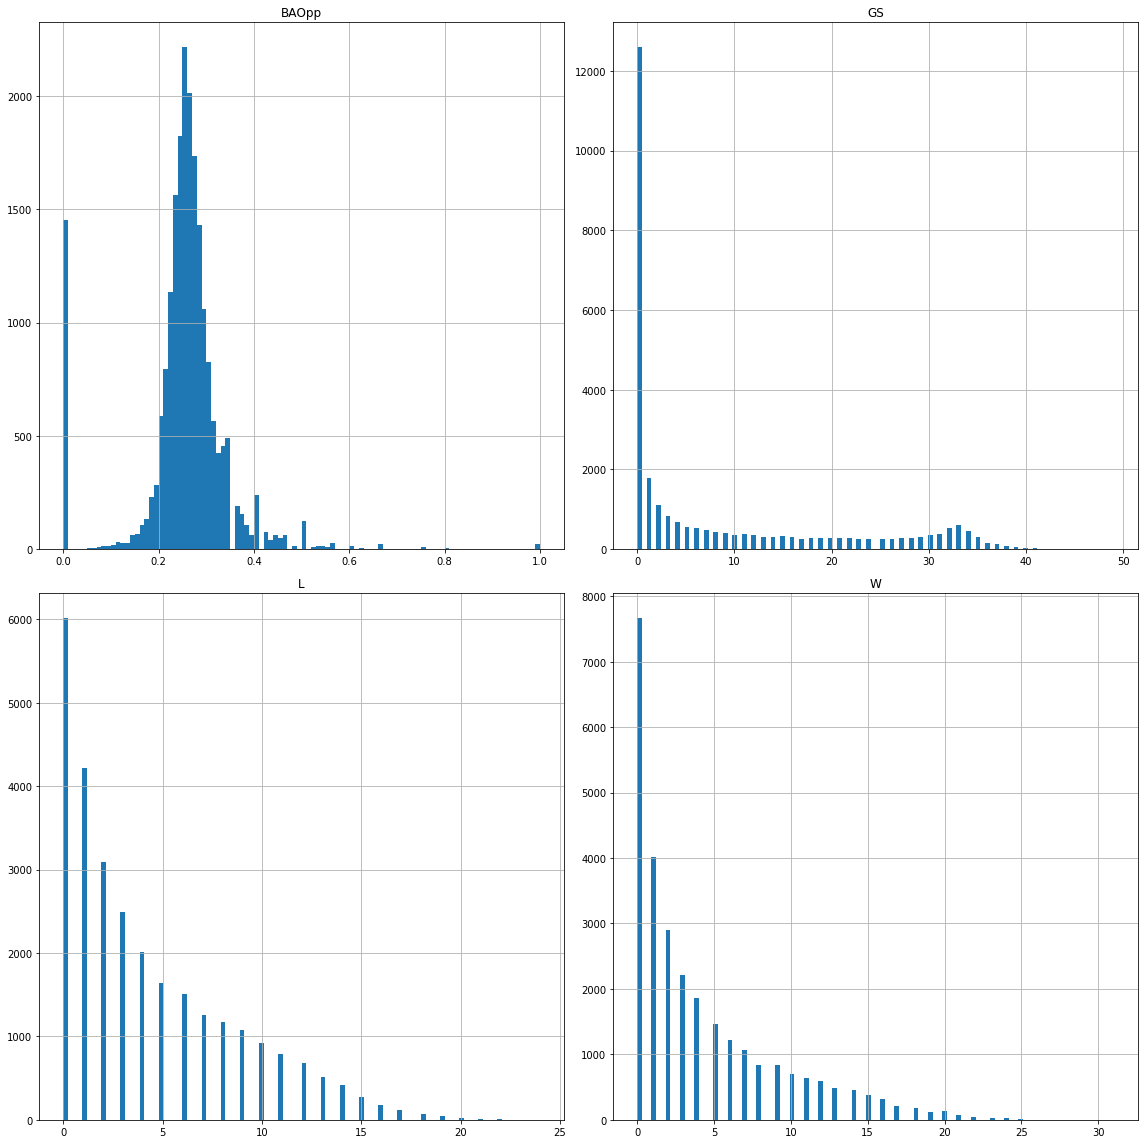

<IPython.core.display.Javascript object>

In [10]:
df_after1950[["GS", "BAOpp", "W", "L"]].hist(bins=100, figsize=(16, 16))
# df_after1950[["GS", "BAOpp", "W", "L"]].hist(figsize=(16, 16))
# df_after1995.hist(figsize=(10, 4))
plt.tight_layout()
plt.show()

   GS, W & L - binominal (only 2 outcomes)
   
   BAOpp - normal distribution

In [ ]:
ax = sns.distplot(df_after1950["GS"])

In [ ]:
ax = sns.distplot(df_after1950["BAOpp"])

In [ ]:
ax = sns.distplot(df_after1950["W"])

In [ ]:
ax = sns.distplot(df_after1950["L"])

# Question 4

In this challenge, you'll again be using the Lahman Baseball Dataset - https://www.kaggle.com/freshrenzo/lahmanbaseballdatabase?select=Pitching.csv, and you'll be focusing on the pitching table as before. We'll get you started, and you just need to answer the following questions.
Focusing on the G (Games) column, obtain 1,000 samples, taking the mean of 100 observations each time. Plot t
he frequencies of the sample means.

In [14]:
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2004,1,SFN,NL,1,0,11,0,0,...,0.0,0.0,2.0,0.0,61.0,5.0,8,NaN,NaN,NaN
1,aardsda01,2006,1,CHN,NL,3,0,45,0,0,...,0.0,1.0,1.0,0.0,225.0,9.0,25,NaN,NaN,NaN
2,aardsda01,2007,1,CHA,AL,2,1,25,0,0,...,3.0,2.0,1.0,0.0,151.0,7.0,24,NaN,NaN,NaN
3,aardsda01,2008,1,BOS,AL,4,2,47,0,0,...,2.0,3.0,5.0,0.0,228.0,7.0,32,NaN,NaN,NaN
4,aardsda01,2009,1,SEA,AL,3,6,73,0,0,...,3.0,2.0,0.0,0.0,296.0,53.0,23,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [20]:
games = df["G"]
games.head()

0    11
1    45
2    25
3    47
4    73
Name: G, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
means = []
n_samples = 1000
sample_size = 100
for _ in range(1000):
    random_sample = games.sample(100, replace=True)
    mean = random_sample.mean()
    means.append(mean)

<IPython.core.display.Javascript object>

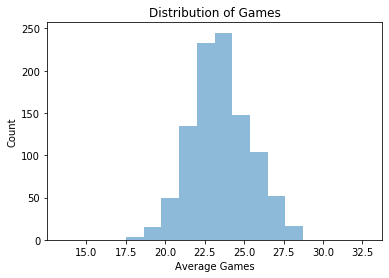

<IPython.core.display.Javascript object>

In [29]:
plt.xlim([min(means) - 5, max(means) + 5])

plt.hist(means, alpha=0.5)
plt.title("Distribution of Games")
plt.xlabel("Average Games")
plt.ylabel("Count")

plt.show()

Normal distribution

Central limit theorem